In [190]:
import librosa
import IPython.display as ipd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display

In [191]:
sr = 22050  # Sampling rate

In [192]:
def split_audio_to_list(source, preemph=True, preemphasis=0.8, min_diff=1500, min_size=3000, chunk_size=9000, db=50):
    if preemph:
        source = np.append(source[0], source[1:] - preemphasis * source[:-1])
    split_list = librosa.effects.split(source, top_db=db).tolist()
    i = len(split_list) - 1
    while i > 0:
        if split_list[i][-1] - split_list[i][0] > min_size:
            now = split_list[i][0]
            prev = split_list[i - 1][1]
            diff = now - prev
            if diff < min_diff:
                split_list[i - 1] = [split_list[i - 1][0], split_list.pop(i)[1]]
        else:
            split_list.pop(i)
        i -= 1
    return [x for x in split_list if x[-1] - x[0] > chunk_size]

In [193]:
def trim_custom(audio, begin_db=25, end_db=35):
    begin = librosa.effects.trim(audio, top_db=begin_db)[1][0]
    end = librosa.effects.trim(audio, top_db=end_db)[1][1]
    return audio[begin:end]

In [194]:
def show_trimmed(source, split_list):
    for part in split_list:
        audio = trim_custom(source[slice(*part)])
        ipd.display(ipd.Audio(audio, rate=sr))
        plt.figure(figsize=(14, 5))
        librosa.display.waveplot(audio, sr=sr)
        plt.show()
        print(len(audio))

In [195]:
def combine(source, split_list, duration):
    audio = [np.pad(trim_custom(source[slice(*part)]), (0, int(sr * duration/10000)), 'constant') for part in split_list]
    return trim_custom(np.concatenate(audio, axis=None))

In [196]:
y, _ = librosa.load('wavs/0x0007f7cf.wav', sr=sr)
ipd.Audio(y, rate=sr)

In [197]:
y_split = split_audio_to_list(y)
y_split

[[1536, 59392], [73216, 116224], [124928, 137216], [139776, 161280]]

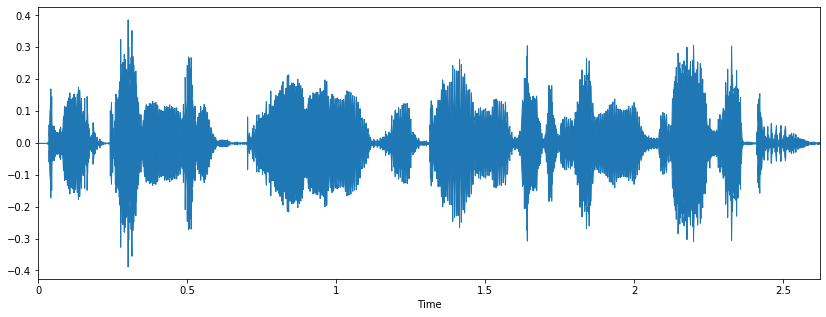

57856


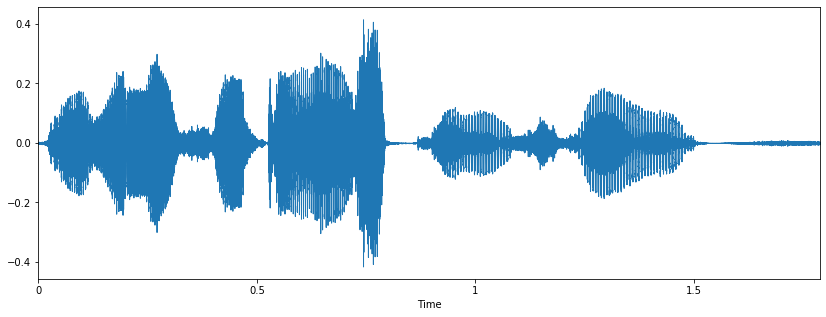

39424


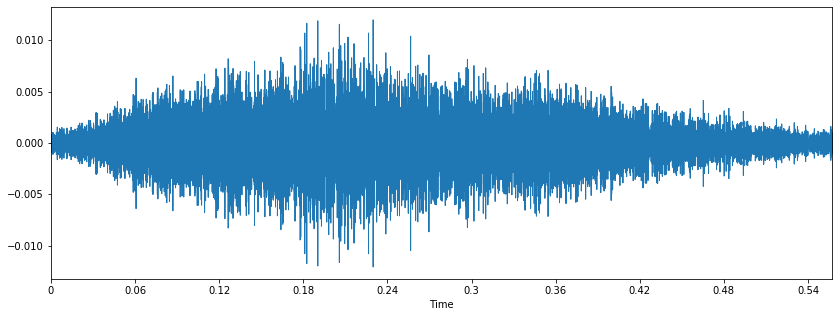

12288


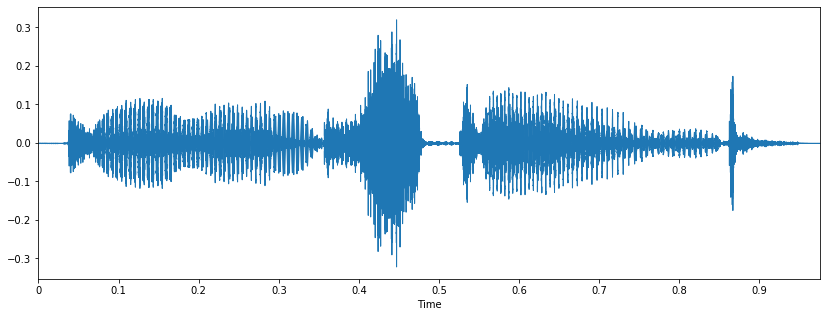

21504


In [198]:
show_trimmed(y, y_split)

In [183]:
combined = combine(y, y_split, duration=1500)
ipd.Audio(combined, rate=sr)

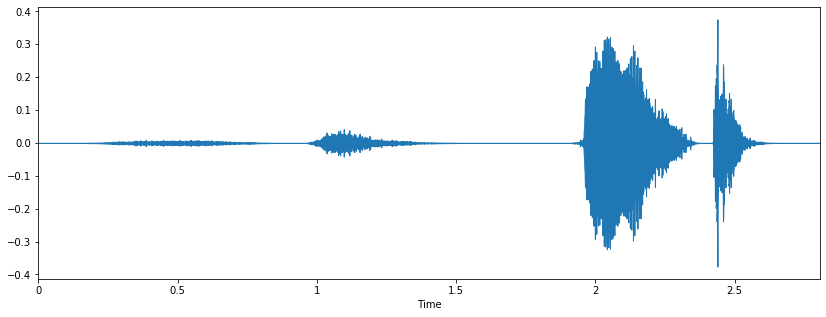

In [184]:
# original
plt.figure(figsize=(14, 5))
librosa.display.waveplot(y, sr=sr)
plt.show()

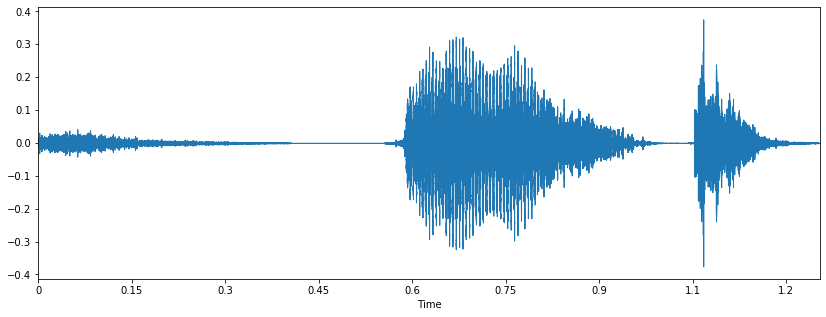

In [185]:
# original
plt.figure(figsize=(14, 5))
librosa.display.waveplot(combined, sr=sr)
plt.show()